#**THE SPARKS FOUNDATION**

#**Graduate Rotational Internship Program**

##***Data Science And Business Analytics Tasks***

###**Author: Akash Jain**


##**Prediction Using Unsupervised ML**

###**Task:** From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually.
* This task is based on Kmeans clustering algorithm as we have to train a model which involves grouping of data for iris dataset species.
* Dataset can be found at https://bit.ly/3kXTdox



#Clustering
* Clustering is an unsupervised learning method whose task is to divide the data points into a number of groups, such that data points in a group are more similar to other data points in the same group and dissimilar to the data points in other groups.
* It is basically a collection of objects on the basis of similarity and dissimilarity between them.

#KMeans Clustering
* KMeans clustering is the simplest Unsupervised Machine Learning algorithm in which the data are grouped into K number of clusters. 
* The algorithm aims at minimizing the within-cluster variance(so that similar observations fall in the same cluster).
* It requires all variables to be numeric variables to be continous as it uses distance measure.

#Steps Involved in Kmeans Algorithm to find best k clusters.
1.   Choose K data points(randomly) to be the initial centroids(cluster centers)
2.   Assign each data point to the closest centroid.
3.   Calculate the mean coordinates of each cluster and assign these as a new centroids.
4.   Reassign clusters based on new centroids.
5.   Keep repeating steps 3 and 4 until convergence.



#Import the required libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import seaborn as sn
%matplotlib inline


# Load the iris dataset


In [2]:
df=pd.read_csv('/content/drive/MyDrive/Iris.csv')

# Display first 5 rows of the dataset


In [3]:
df.head() 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Since id is not a part of training ,testing ,visualizing model
# So it is better to drop it
df=df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Check no of rows and columns in the dataset


In [5]:
df.shape 

(150, 5)

There are 150 rows and 4 columns in the dataframe

# Check if there are missing values on any columns and their data type


In [6]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

No missing values in the dataframe

# Display the full summary of the dataframe

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
#to know all types of unique values
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
df['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [10]:
df.describe().round(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [11]:
#drop species as we have to cluster only numeric data
iris = pd.DataFrame(df)
df = iris.drop(columns=["Species"])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Correlation 

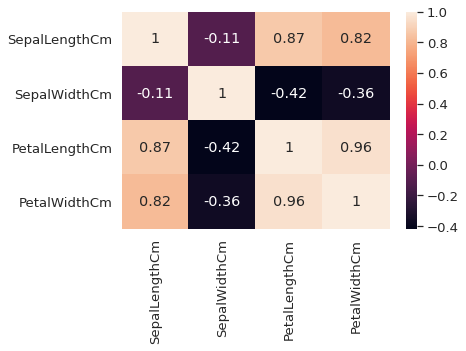

In [12]:
#create a heatmap to demonstrate the correlation magnitude among the variables
corr=df.corr().round(2)
sn.set(font_scale=1.2)
sn.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True) 
#annot argument writes the data value into each cell 
#fmt parameter add text to the heatmap cell and formats the cell values

* SepalLenth is positively correalted with PetalLenth and PetalWidth
* PetalLenth and PetalWidth are positively correlated with each other
* SepalWidth is negatively correlated with SepalLength, PetalLenth and PetalWidth

#Finding optimal number of clusters using the elbow method  


In [13]:
from sklearn.cluster import KMeans

#Calculating the Within-Cluster-Sum-of-Squares
x=df.values
WCSS = []
clusters_range = range(1,11)
for i in clusters_range:
 km = KMeans(n_clusters=i, init="k-means++",max_iter=300,n_init=10, random_state=0)
 km = km.fit(x)
 WCSS.append(km.inertia_)

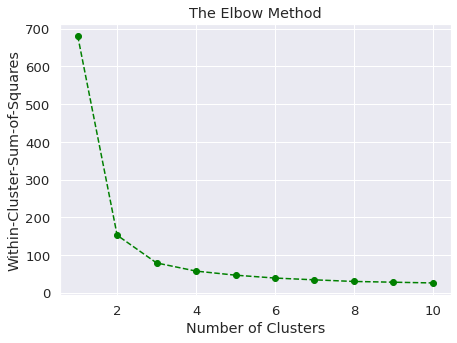

In [14]:
#Plotting the "Within-Cluster-Sum-of-Squares" against clusters range to observe 'The elbow'
plt.figure(figsize=(7,5))
plt.plot(clusters_range,WCSS,'go--',color='green')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster-Sum-of-Squares')
plt.show()

We see that after 3 the drop in WCSS is minimal.So we choose 3 as the optimal number of clusters

#Training the K-means model on a dataset  


In [15]:
kmeans = KMeans(n_clusters=3, init='k-means++',max_iter=300, n_init=10,random_state= 0)  
y_predict= kmeans.fit_predict(x)

# Check parameters of trained data


In [16]:
# returns centroid of the cluster formed
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [17]:
labels = kmeans.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

# Visualizing the Model Cluster

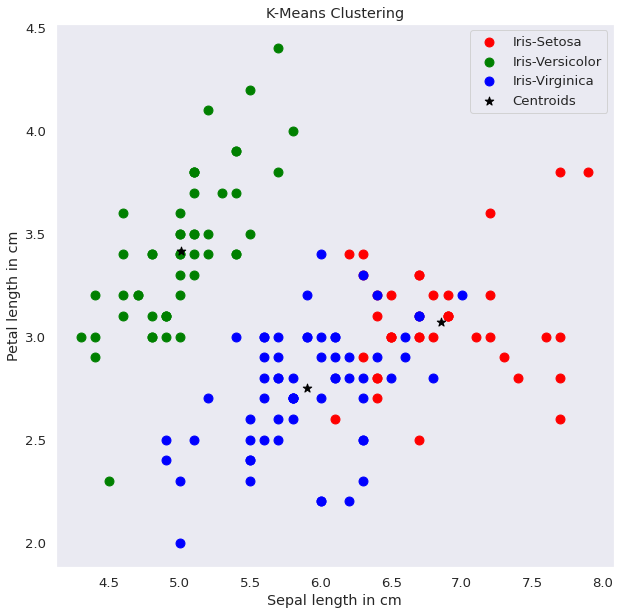

In [18]:
# Visualising the clusters
plt.figure(figsize=(10,10))
x=df.iloc[:,[0,1,2,3]].values
plt.scatter(x[y_predict==0,0], x[y_predict==0,1], s=80, c='red', label='Iris-Setosa')
plt.scatter(x[y_predict==1,0], x[y_predict==1,1], s=80, c='green', label='Iris-Versicolor')
plt.scatter(x[y_predict==2,0], x[y_predict==2,1], s=80, c='blue', label='Iris-Virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=80, c='black', label='Centroids',marker='*')
plt.xlabel('Sepal length in cm')
plt.ylabel('Petal length in cm')
plt.title('K-Means Clustering')
plt.legend()
plt.grid()
plt.show()

#Model Metrics

In [20]:
from sklearn import metrics
# Calculating Silhouette Score
print('Silhouette Score: ',metrics.silhouette_score(x, labels, metric='euclidean'))
#Calculating Calinski and Harabasz Score
print('Calinski and Harabasz Score: ',metrics.calinski_harabasz_score(x, labels))

Silhouette Score:  0.5525919445499757
Calinski and Harabasz Score:  560.3999242466401


* Silhouette Score shows that our model is 55% efficient for clustering
* Since Calinski and Harabasz Score is high,it means clusters are dense and well seperated

##**We can conclude that 3 optimal clusters required for the dataset**


Task Completed Successfully!

